# In questo script recupero informazioni relative al Equivalent Noise Charge dei FE RD53A e RD53B


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [2]:
%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system
%run ./Functions/parseCalibs.ipynb #parsing dei file txt. input: path[]; output: dataframe[]

In [3]:
button = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit/calib_CD_150_I_LDAC_14_0_soglia_1000_elettroni.txt


In [4]:
data = parseCalibs(button.files) #estrapolo i dati dei file di configurazione

1 dataframe crated!


In [5]:
#correnti = [8.0, 10.0, 12.0, 13.0, 14.0, 16.0, 18.0, 20.0] #vettore delle correnti ILDAC usate per i test

### Filtra per tipo i dati per ricavare le sigma di interpolazione attraverso Error Function
La funzione recupera i dati riguardanti le soglie dei pixel selezionandoli per tipo (RD53A oppure RD53B).

In [18]:
def getErrorFunctionSigma(dataframe, tipo):
    data = []    
    for i in dataframe:
        filtered_type = i[0].loc[(i[0]['Tipo'] == tipo) & (i[0]['Channel'] != 67.0)]
        sigmas = filtered_type['ErrFunSigma'].values.tolist()
        data.append(sigmas)
    return data

In [19]:
sigmasA = getErrorFunctionSigma(data, "A")
sigmasB = getErrorFunctionSigma(data, "B")

## Plot istogramma ENC

In [20]:
def plotHistENC(sigmasA):
    
    for i in sigmasA:
        A = np.asarray(i)
        #calcolo media e deviazione standard delle due distribuzioni
        A_mean = np.mean(A)
        A_sigma = np.std(A)
    
        fig, ax = plt.subplots(1, 1, figsize= (8,4))
    
        kws = dict(histtype= "stepfilled",alpha= 0.5, linewidth = 2)
    
        ax.hist(i, color="lightblue", edgecolor = "k", **kws,  density = False)
        ax.legend([("RD53A\n$\mu$~" + str((A_mean)) + " $\sigma$~"+ str(A_sigma))])
        ax.set_xlabel("Qth")
        ax.set_ylabel("Frequency")
    
    
        fig.suptitle("Equivalent Noise Charge Distribution", fontsize=16)
    #plt.savefig(title+'.png', bbox_inches='tight')

In [21]:
def plotHistENCB(sigmasB):
    for i in sigmasB:
        B = np.asarray(i)
        #calcolo media e deviazione standard delle due distribuzioni
        B_mean = np.mean(B)
        B_sigma = np.std(B)
    
        fig, ax = plt.subplots(1, 1, figsize= (8,4))
    
        kws = dict(histtype= "stepfilled",alpha= 0.5, linewidth = 2)
    
        ax.hist(i, color="coral", edgecolor = "k", **kws,  density = False)
        ax.legend([("RD53B\n$\mu$~" + str((B_mean)) + " $\sigma$~"+ str(B_sigma))])
        ax.set_xlabel("Qth")
        ax.set_ylabel("Frequency")
        
        
    
        fig.suptitle("Equivalent Noise Charge Distribution", fontsize=16)

In [22]:
def removeOutliers(lst):
    for i in lst:
        i.remove(max(i))
        i.remove(min(i))

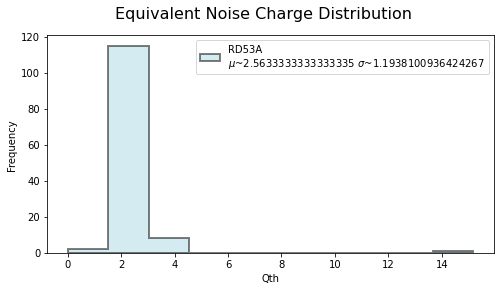

In [23]:
plotHistENC(sigmasA)

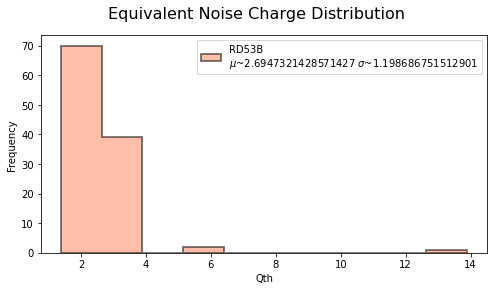

In [24]:
plotHistENCB(sigmasB)

In [25]:
removeOutliers(sigmasA)
removeOutliers(sigmasB)

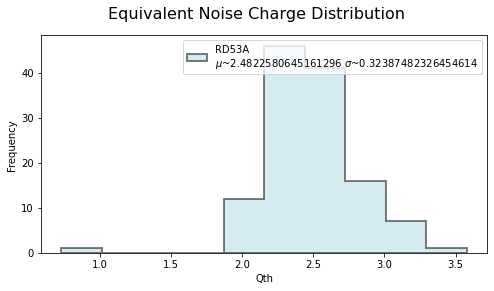

In [26]:
plotHistENC(sigmasA)

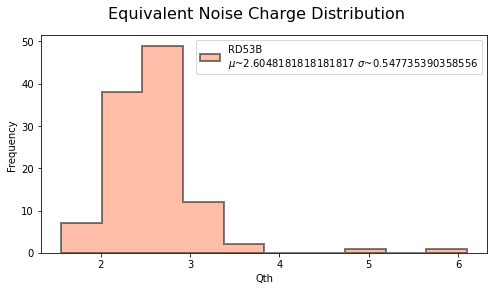

In [27]:
plotHistENCB(sigmasB)

In [28]:
removeOutliers(sigmasA)

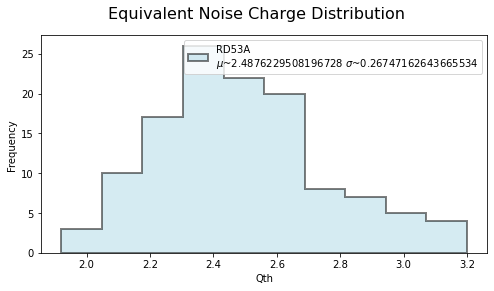

In [29]:
plotHistENC(sigmasA)